<a href="https://colab.research.google.com/github/fida-ghourabi/Diabetes/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd

# Charger le fichier
df = pd.read_csv('diabetes.csv')
print(df.head())  # Affiche les premières lignes


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
print(df.info())       # Types de colonnes
print(df.describe())   # Statistiques générales
print(df.columns)      # Liste des colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

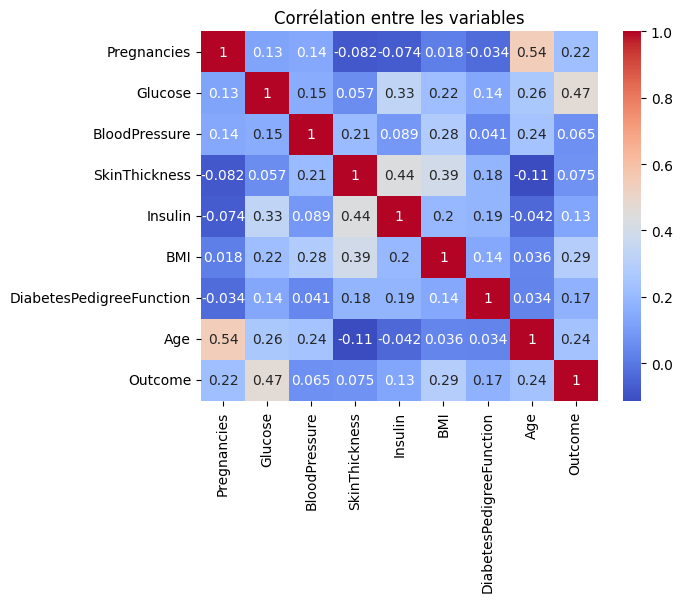

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Variables d’entrée
y = df['Outcome']               # Cible

# Division train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Précision :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))


Précision : 0.7467532467532467
Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Matrice de confusion :
 [[78 21]
 [18 37]]


In [10]:
# Exemple : une patiente : [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age]
import pandas as pd

colonnes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

new_data = pd.DataFrame([[2, 130, 70, 22, 85, 28.5, 0.32, 45]], columns=colonnes)

# Maintenant le scaler ne donne plus de warning
new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)
print("🔍 Résultat :", "À risque de diabète" if prediction[0] == 1 else "Pas à risque")


🔍 Résultat : À risque de diabète


In [11]:
import pandas as pd

# Données du patient
colonnes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

nouvelle_personne = pd.DataFrame([[5, 155, 85, 30, 100, 33.6, 0.65, 50]], columns=colonnes)

# Mise à l’échelle
nouvelle_personne_scaled = scaler.transform(nouvelle_personne)

# Prédiction
prediction = model.predict(nouvelle_personne_scaled)

# Résultat
print("🔍 Résultat :", "À risque de diabète" if prediction[0] == 1 else "Pas à risque")


🔍 Résultat : À risque de diabète


In [12]:
colonnes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Données d'un profil sain
personne_saine = pd.DataFrame([[1, 95, 70, 20, 85, 24.5, 0.2, 29]], columns=colonnes)

# Mise à l’échelle
personne_saine_scaled = scaler.transform(personne_saine)

# Prédiction
prediction = model.predict(personne_saine_scaled)

# Affichage
print("🔍 Résultat :", "À risque de diabète" if prediction[0] == 1 else "Pas à risque")


🔍 Résultat : Pas à risque
